# Factor Analysis of Mixed Data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scientisttools.decomposition import FAMD
from scientisttools.extractfactor import get_eig,get_famd_ind,get_famd_col,get_famd_var,get_famd_mod,summaryFAMD
from scientisttools.pyplot import plotFAMD,plot_eigenvalues,plot_cosines,plot_contrib,plot_correlation_circle
from scientisttools.ggplot import fviz_famd_ind,fviz_famd_col,fviz_famd_mod,fviz_famd_var
from plydata import *

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

In [3]:
# Chargement des données
D = pd.read_excel("Tennis_Players_AFDM.xlsx",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Edberg,187,droitier,une,41,36,6,finale,1
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4
Kuerten,190,droitier,une,20,9,3,vainqueur,38
Lendl,187,droitier,une,94,50,8,vainqueur,20


In [4]:
#instaciation
afdm = FAMD(n_components = None,
            row_labels=list(D.index[0:16]), #jusqu'à Wilander
            row_sup_labels=list(D.index[16:]), #à partir de Djokovic
            quanti_labels=['Taille','Titres','Finales','TitresGC'],
            quanti_sup_labels=['BestClassDouble'],
            quali_labels=['Lateralite','MainsRevers','RolandGarros'],
            parallelize=False)
#entraînement
afdm.fit(D)

FAMD(quali_labels=['Lateralite', 'MainsRevers', 'RolandGarros'],
     quanti_labels=['Taille', 'Titres', 'Finales', 'TitresGC'],
     quanti_sup_labels=['BestClassDouble'],
     row_labels=['Agassi', 'Becker', 'Borg', 'Connors', 'Courier', 'Edberg',
                 'Kafelnikov', 'Kuerten', 'Lendl', 'McEnroe', 'Nastase',
                 'Rafter', 'Safin', 'Sampras', 'Vilas', 'Wilander'],
     row_sup_labels=['Djokovic', 'Federer', 'Murray', 'Nadal'])

In [5]:
print(help(get_eig))

Help on function get_eig in module scientisttools.extractfactor:

get_eig(self) -> pandas.core.frame.DataFrame
    self : an instance of class PCA, PartialPCA, CA, MCA, FAMD, MFA,CMDS
    
    Returns
    -------
    eigenvalue, difference, variance percent and cumulative variance of percent

None


In [6]:
#valeurs propres
print(get_eig(afdm))

       eigenvalue  difference  proportion  cumulative
Dim.1    3.125964    1.701771   39.074556   39.074556
Dim.2    1.424193    0.286425   17.802418   56.876974
Dim.3    1.137768    0.285193   14.222105   71.099079
Dim.4    0.852575    0.125118   10.657188   81.756267
Dim.5    0.727457    0.286394    9.093217   90.849484
Dim.6    0.441063    0.199320    5.513292   96.362776
Dim.7    0.241744    0.192509    3.021796   99.384572
Dim.8    0.049234         NaN    0.615428  100.000000


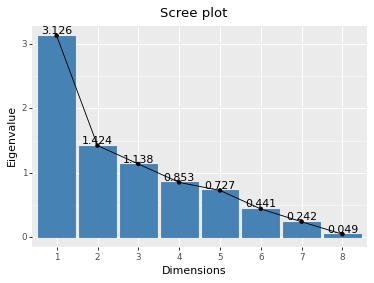

In [7]:
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(afdm,choice="eigenvalue",add_labels=True)
print(p)

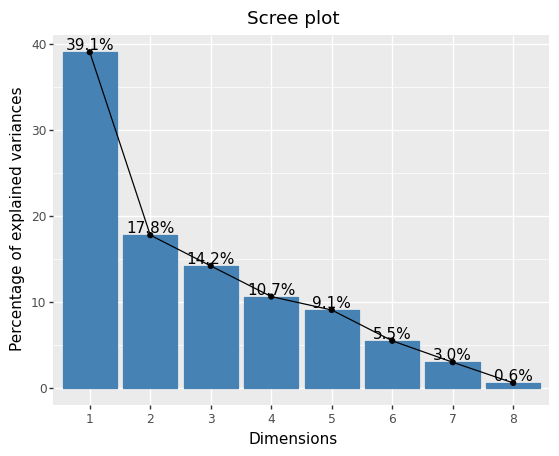

In [8]:
p = fviz_screeplot(afdm,choice="proportion",add_labels=True)
print(p)

In [9]:
print(help(summaryFAMD))

Help on function summaryFAMD in module scientisttools.extractfactor:

summaryFAMD(self, digits=3, nb_element=10, ncp=3, to_markdown=False, tablefmt='pipe', **kwargs)
    Printing summaries of factor analysis of miixed data model
    
    Parameters
    ----------
    self        :   an obect of class FAMD.
    digits      :   int, default=3. Number of decimal printed
    nb_element  :   int, default = 10. Number of element
    ncp         :   int, default = 3. Number of componennts
    to_markdown :   Print DataFrame in Markdown-friendly format.
    tablefmt    :   Table format. For more about tablefmt, see : https://pypi.org/project/tabulate/
    **kwargs    :   These parameters will be passed to tabulate.

None


In [10]:
#summary
summaryFAMD(afdm,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |   Dim.6 |   Dim.7 |   Dim.8 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| Variance                |   3.126 |   1.424 |   1.138 |   0.853 |   0.727 |   0.441 |   0.242 |   0.049 |
| Difference              |   1.702 |   0.286 |   0.285 |   0.125 |   0.286 |   0.199 |   0.193 | nan     |
| % of var.               |  39.075 |  17.802 |  14.222 |  10.657 |   9.093 |   5.513 |   3.022 |   0.615 |
| Cumulative of % of var. |  39.075 |  56.877 |  71.099 |  81.756 |  90.849 |  96.363 |  99.385 | 100     |

Individuals (the 10 first)

|            |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |   Dim.3 |    ctr |   cos2 |
|:-----------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|--

In [11]:
print(help(get_famd_ind))

Help on function get_famd_ind in module scientisttools.extractfactor:

get_famd_ind(self) -> dict
    Extract individuals informations
    
    Parameters
    ----------
    self : an instance of class FAMD
    
    Returns
    -------
    Factor Analysis of Mixed Data - Results for individuals
        Names       Description
    1   "coord"     "Coordinates for the individuals"
    2   "cos2"      "Cos2 for the individuals"
    3   "contrib"   "Contributions of the individuals"
    4   "infos"     "Additionnal informations for the individuals :"
                        - distance between individuals and inertia
                        - weight for the individuals
                        - inertia for the individuals

None


In [12]:
row = get_famd_ind(afdm)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos', 'ind_sup'])

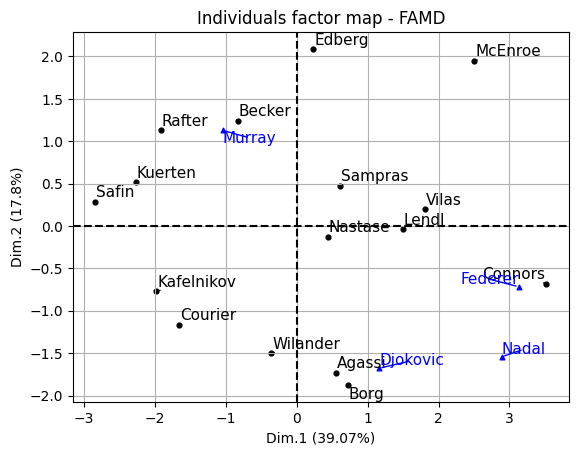

In [13]:
#directement représentation graphique
plotFAMD(afdm,choice='ind',repel=True,ind_sup=True)

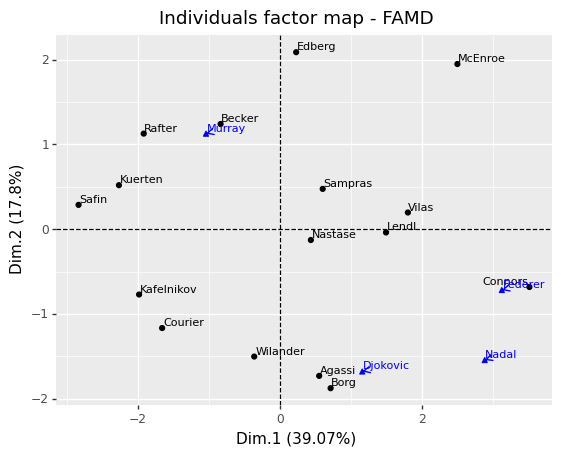

In [14]:
p = fviz_famd_ind(afdm,
                  color="black",
                  repel=True)
print(p)

In [15]:
row["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
Agassi,0.615744,13.128774,0.067931,1.441804,1.600870,0.037837,2.849214,1.386989
Becker,1.395121,6.762551,12.329403,0.000180,4.877059,1.585008,0.295502,0.037431
Borg,1.024529,15.430990,0.828997,5.397005,6.599260,2.290836,0.187957,2.285022
Connors,24.774841,2.035412,6.914092,28.884809,0.038353,4.679579,0.814024,0.682638
Courier,5.510469,5.960298,2.704298,0.267438,3.002467,0.381159,0.382702,0.972540
Edberg,0.105857,19.137974,2.953089,10.389774,9.423708,12.187496,10.197904,11.222354


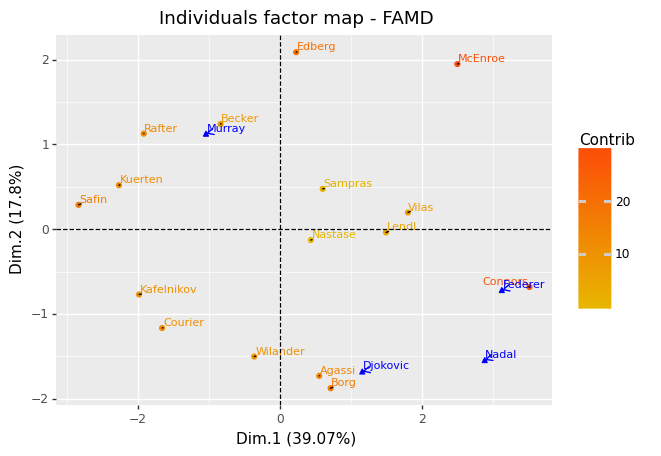

In [16]:
p = fviz_famd_ind(afdm,
                  color="contrib",
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

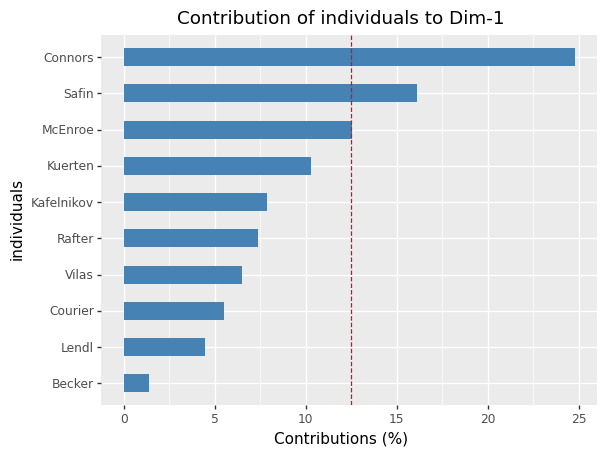

In [17]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(afdm,choice="ind",axis=0,top_contrib=10)
print(p)

In [18]:
row["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
Agassi,0.080645,0.783403,0.003238,0.051503,0.048793,0.000699,0.028858,0.002861
Becker,0.134849,0.297804,0.433758,0.000005,0.109703,0.021616,0.002209,0.000057
Borg,0.087282,0.598936,0.025705,0.125402,0.130834,0.027537,0.001238,0.003066
Connors,0.672505,0.025172,0.068311,0.213847,0.000242,0.017923,0.001709,0.000292
Courier,0.546639,0.269380,0.097642,0.007236,0.069313,0.005335,0.002936,0.001520
Edberg,0.006011,0.495084,0.061030,0.160899,0.124521,0.097640,0.044780,0.010036


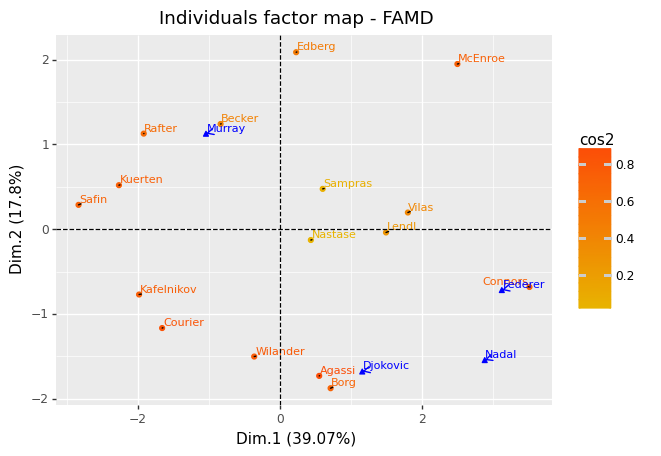

In [19]:
p = fviz_famd_ind(afdm,
                  color="cos2",
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

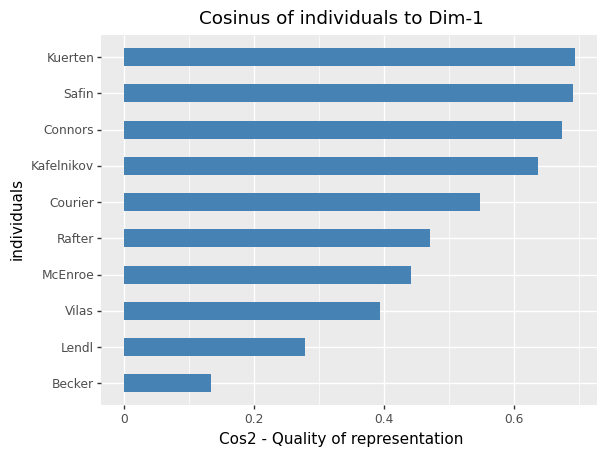

In [20]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(afdm,choice="ind",axis=0)
print(p)

In [21]:
import numpy as np
np.random.seed(123)
my_cont_var = np.random.normal(size=row["coord"].shape[0])
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128]


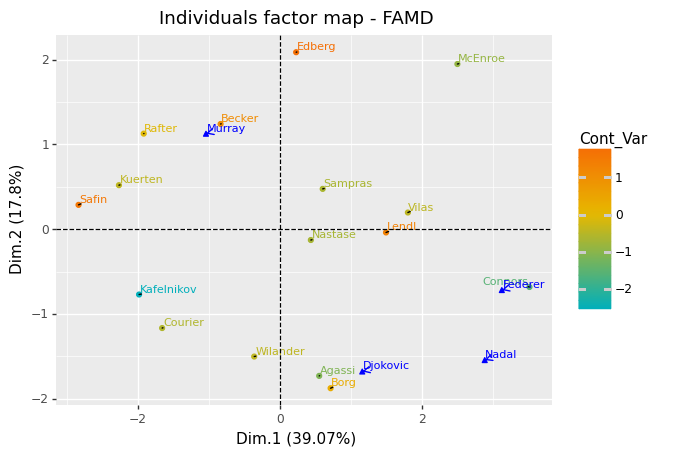

In [22]:
p = fviz_famd_ind(afdm,
                  color=my_cont_var,
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(row["coord"])
kmeans.labels_

array([1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1])

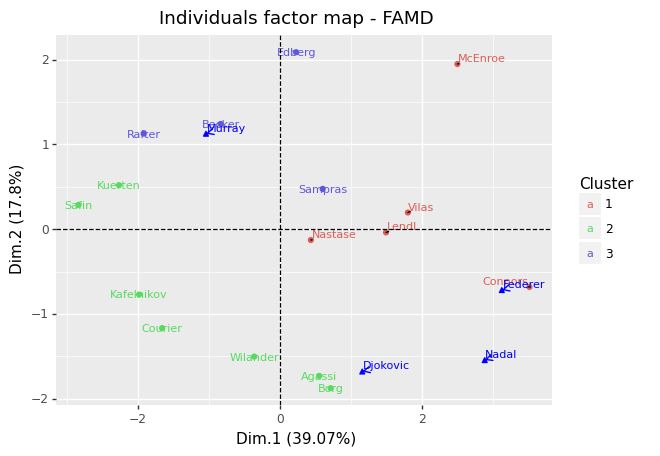

In [24]:
p = fviz_famd_ind(afdm,
                  color=kmeans,
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

## Variables

### Variables quantitatives

In [25]:
from scientisttools.extractfactor import get_famd_col
col = get_famd_col(afdm)
col.keys()

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'quanti_sup'])

In [26]:
col["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
Taille,-0.762939,0.339587,0.231060,0.093668,-0.119120,0.389993,0.271806,0.016688
Titres,0.935937,-0.074027,0.181947,0.066325,-0.145818,0.156876,0.085263,-0.167017
Finales,0.863628,0.006709,-0.020329,0.053564,-0.319564,0.332825,-0.158082,0.113735
TitresGC,0.557497,-0.181030,0.563091,0.445676,0.308267,-0.138463,0.146461,0.071239


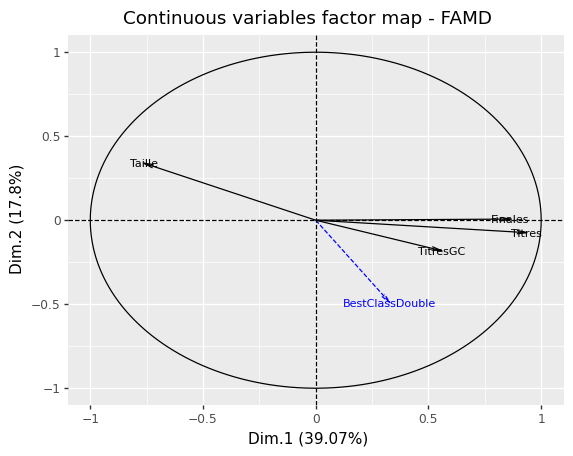

In [27]:
from scientisttools.ggplot import fviz_famd_col
p = fviz_famd_col(afdm,color="black")
print(p)

In [28]:
col["contrib"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
Taille,18.620702,8.097177,4.692416,1.029088,1.950575,34.483618,30.560764,0.565660
Titres,28.022668,0.384778,2.909622,0.515965,2.922917,5.579743,3.007224,56.657082
Finales,23.859953,0.003161,0.036322,0.336521,14.038088,25.114796,10.337401,26.273758
TitresGC,9.942619,2.301077,27.867880,23.297331,13.063077,4.346794,8.873416,10.307806


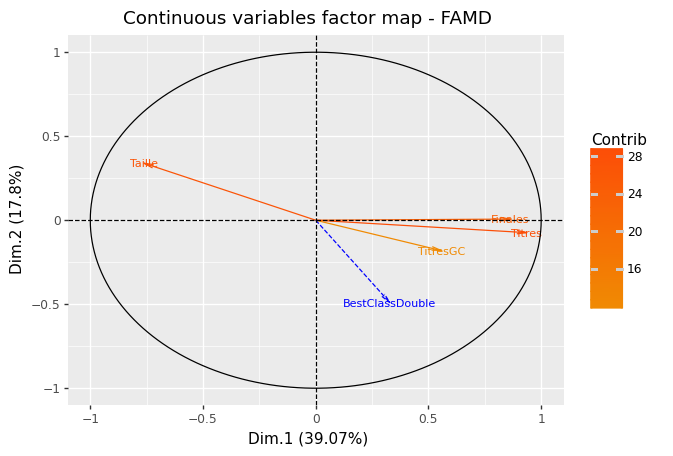

In [29]:
p = fviz_famd_col(afdm,
                  color="contrib")
print(p)

In [30]:
p = fviz_contrib(afdm,choice="var",axis=0)
print(p)

AttributeError: 'FAMD' object has no attribute 'var_contrib_'

In [ ]:
col["cos2"].head(6)

In [ ]:
p = fviz_famd_col(afdm,
                  color="cos2")
print(p)

In [ ]:
p = fviz_cosines(afdm,choice="var",axis=0)
print(p)

In [ ]:
np.random.seed(123)
my_cont_var = np.random.normal(size=col["coord"].shape[0])
print(my_cont_var)

In [ ]:
p = fviz_famd_col(afdm,
                  color=my_cont_var)
print(p)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(col["coord"])
kmeans.labels_

In [ ]:
p = fviz_famd_col(afdm,
                  color=kmeans)
print(p)

### Categoricals variables - Modalites

In [ ]:
mod = get_famd_mod(afdm)
mod.keys()

In [ ]:
mod["coord"]

In [ ]:
p = fviz_famd_mod(afdm,color="black",repel=True)
print(p)

In [ ]:
mod["contrib"]

In [ ]:
p = fviz_famd_mod(afdm,
                  color="contrib",
                  repel=True)
print(p)

In [ ]:
p = fviz_contrib(afdm,choice="mod",axis=0)
print(p)

In [ ]:
mod["cos2"]

In [ ]:
p = fviz_famd_mod(afdm,
                  color="cos2",
                  repel=True)
print(p)

In [ ]:
p = fviz_cosines(afdm,choice="mod",axis=0)
print(p)

### Variables - Overall

In [ ]:
p = fviz_famd_var(afdm,color="black",repel=True)
print(p)

In [ ]:
np.random.seed(123)
my_cont_var = np.random.normal(size=7)
my_cont_var

In [ ]:
p = fviz_famd_var(afdm,
                  color=my_cont_var,
                  repel=True)
print(p)

In [ ]:
from scientisttools.ggplot import fviz_corrcircle
p = fviz_corrcircle(afdm)
print(p)

In [ ]:
from scientisttools.extractfactor import dimdesc
d = dimdesc(afdm)
d["Dim.1"]["quanti"]

In [ ]:
d["Dim.1"]["quali"]

In [ ]:
d["Dim.2"]